# 🏅 Olympic Medalists Dataset - Exploratory Data Analysis & Insights

Welcome to this detailed analysis of the **Olympic Medalists Dataset**, containing records of medal winners from both the *Summer* and *Winter Olympic Games*, spanning over a century of sporting history.

The Olympics are regarded as the most prestigious global sports competition, where athletes from around the world come together to compete for glory. This dataset gives us the opportunity to extract hidden trends, performance patterns, and historical insights from this iconic event.

## 🎯 Objectives of This Analysis

In this notebook, we will:

✅ Perform structured **Exploratory Data Analysis (EDA)**  
✅ Visualize key trends using charts, heatmaps, and distributions  
✅ Explore *gender participation* patterns and shifts  
✅ Identify top-performing **countries** and **athletes**  
✅ Compare *Summer vs Winter* Games performance  
✅ Build a basic **Machine Learning** model to predict medal outcomes  


## ⚡ Why This Matters

Understanding Olympic trends can reveal:

- Historical dominance of specific countries or sports  
- Growth of women's and mixed events over the years  
- Emerging nations and evolving competitiveness  
- The relationship between country, sport, and medal success  


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/olympic-medalist-dataset-18962024/all_olympic_medalists.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')  # Suppress all warnings

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/kaggle/input/olympic-medalist-dataset-18962024/all_olympic_medalists.csv')
df.head()

,season,year,medal,country_code,country,athletes,games,sport,event_gender,event_name
0,Summer,1896,Gold,USA,United States,Thomas BURKE,1896 Athens,Athletics,Men's,100m
1,Summer,1896,Silver,GER,Germany,Fritz HOFMANN,1896 Athens,Athletics,Men's,100m
2,Summer,1896,Bronze,HUN,Hungary,Alajos SZOKOLYI,1896 Athens,Athletics,Men's,100m
3,Summer,1896,Bronze,USA,United States,Francis LANE,1896 Athens,Athletics,Men's,100m
4,Summer,1896,Gold,USA,United States,Thomas BURKE,1896 Athens,Athletics,Men's,400m


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20247 entries, 0 to 20246
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   season        20247 non-null  object
 1   year          20247 non-null  int64 
 2   medal         20243 non-null  object
 3   country_code  20243 non-null  object
 4   country       20243 non-null  object
 5   athletes      19820 non-null  object
 6   games         20247 non-null  object
 7   sport         20247 non-null  object
 8   event_gender  20247 non-null  object
 9   event_name    20247 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.5+ MB


In [5]:
df.isnull().sum()

season            0
year              0
medal             4
country_code      4
country           4
athletes        427
games             0
sport             0
event_gender      0
event_name        0
dtype: int64

In [6]:
# Drop rows where either 'medal' or 'country' is NaN
df = df.dropna(subset=['medal', 'country','country_code'])

# Fill missing 'athletes' values with "Not available"
df['athletes'] = df['athletes'].fillna('Not available')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20243 entries, 0 to 20246
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   season        20243 non-null  object
 1   year          20243 non-null  int64 
 2   medal         20243 non-null  object
 3   country_code  20243 non-null  object
 4   country       20243 non-null  object
 5   athletes      20243 non-null  object
 6   games         20243 non-null  object
 7   sport         20243 non-null  object
 8   event_gender  20243 non-null  object
 9   event_name    20243 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.7+ MB


## Gender Participation Over the Years

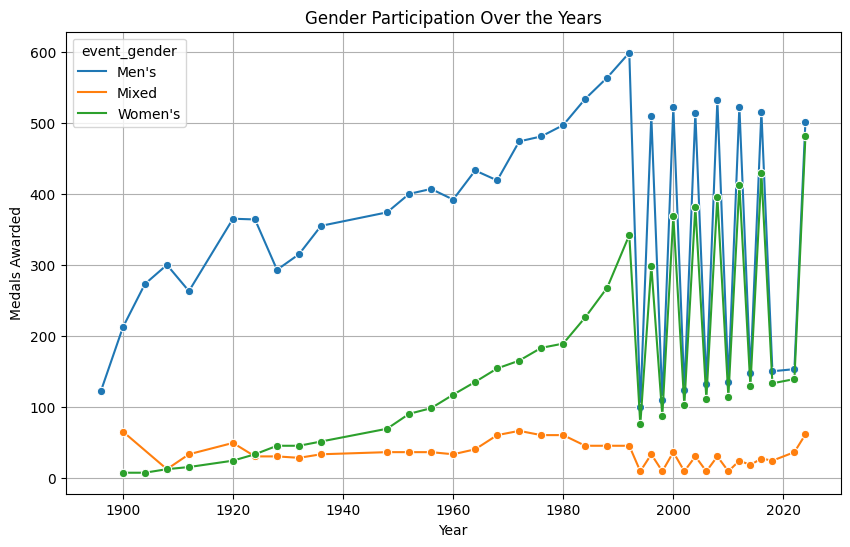

In [8]:
gender_trend = df.groupby(['year', 'event_gender']).size().reset_index(name='medal_count')

plt.figure(figsize=(10,6))
sns.lineplot(data=gender_trend, x='year', y='medal_count', hue='event_gender', marker='o')
plt.title('Gender Participation Over the Years')
plt.xlabel('Year')
plt.ylabel('Medals Awarded')
plt.grid(True)
plt.show()

## Most Decorated Athletes

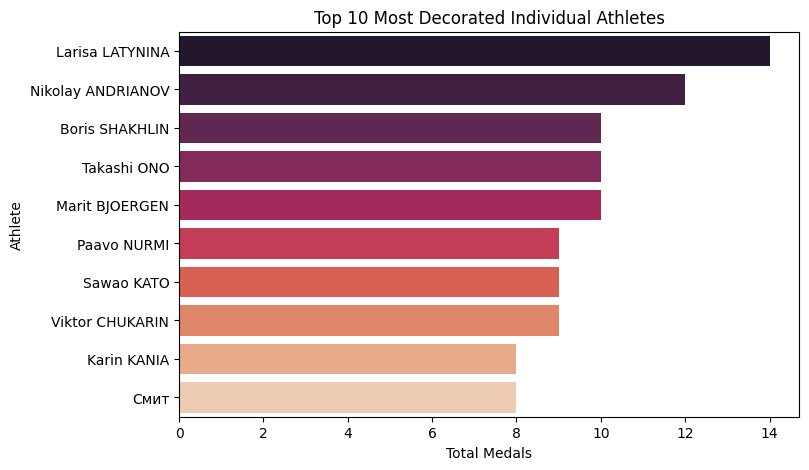

In [9]:
# Step 1: Remove rows where athlete name appears in country names
filtered_df = df[~df['athletes'].isin(df['country'])]

# Step 2: Remove rows where athletes is 'Not available'
filtered_df = filtered_df[filtered_df['athletes'] != 'Not available']

# Step 3: Get top 10 athletes by count
top_athletes = filtered_df['athletes'].value_counts().head(10)

# Step 4: Plot
plt.figure(figsize=(8,5))
sns.barplot(y=top_athletes.index, x=top_athletes.values, palette='rocket')
plt.title('Top 10 Most Decorated Individual Athletes')
plt.xlabel('Total Medals')
plt.ylabel('Athlete')
plt.show()


## Top Sports by Medal Count

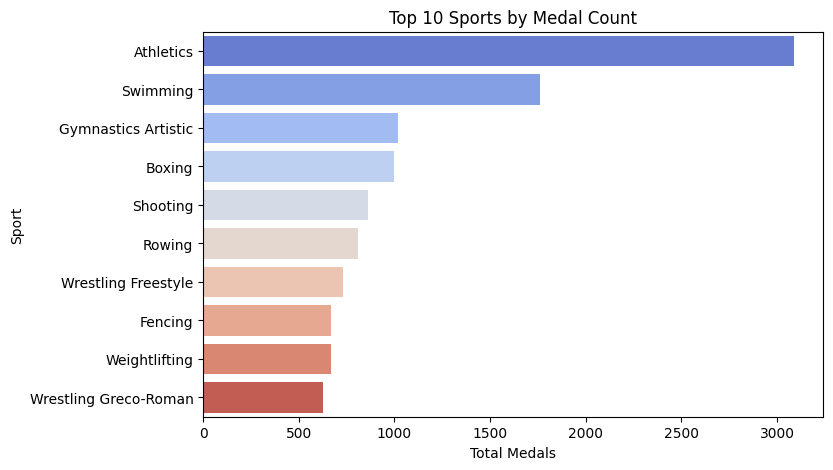

In [10]:
top_sports = df['sport'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(y=top_sports.index, x=top_sports.values, palette='coolwarm')
plt.title('Top 10 Sports by Medal Count')
plt.xlabel('Total Medals')
plt.ylabel('Sport')
plt.show()


 ## Medal Count by Sport & Gender (Heatmap)

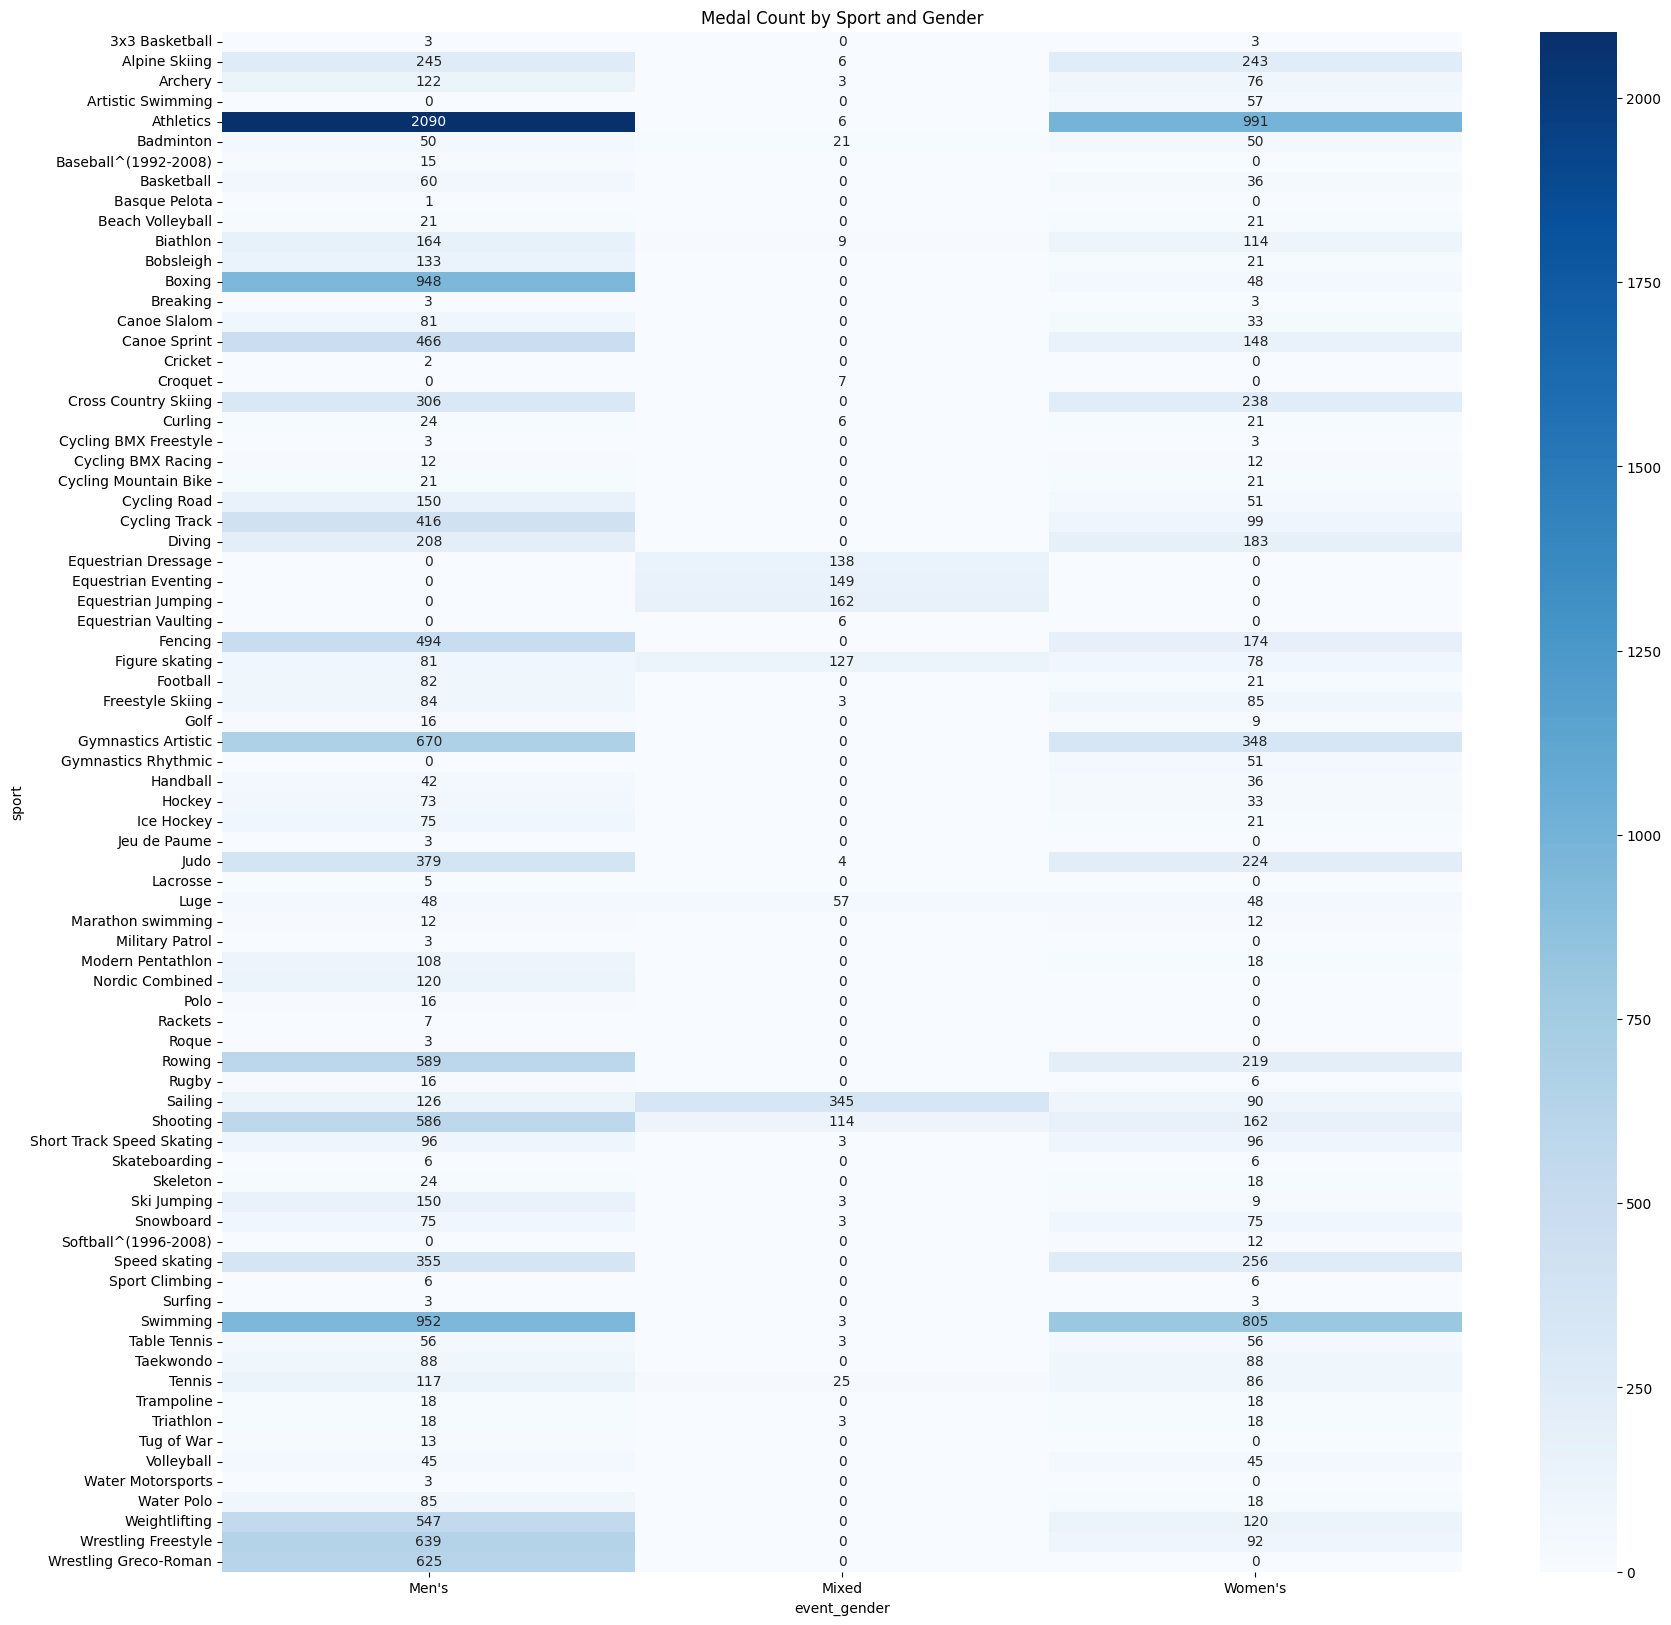

In [11]:
pivot = df.pivot_table(index='sport', columns='event_gender', values='medal', aggfunc='count').fillna(0)

plt.figure(figsize=(20,20))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='Blues')
plt.title('Medal Count by Sport and Gender')
plt.show()


## Medals Distribution Across Seasons (Summer vs Winter)

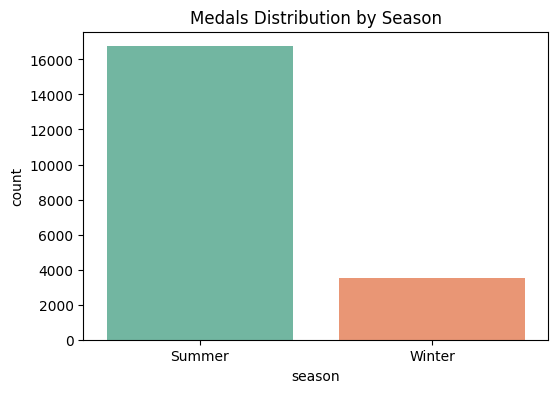

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='season', palette='Set2')
plt.title('Medals Distribution by Season')
plt.show()

## Top 10 Countries in Summer vs Winter Games (Side-by-Side)

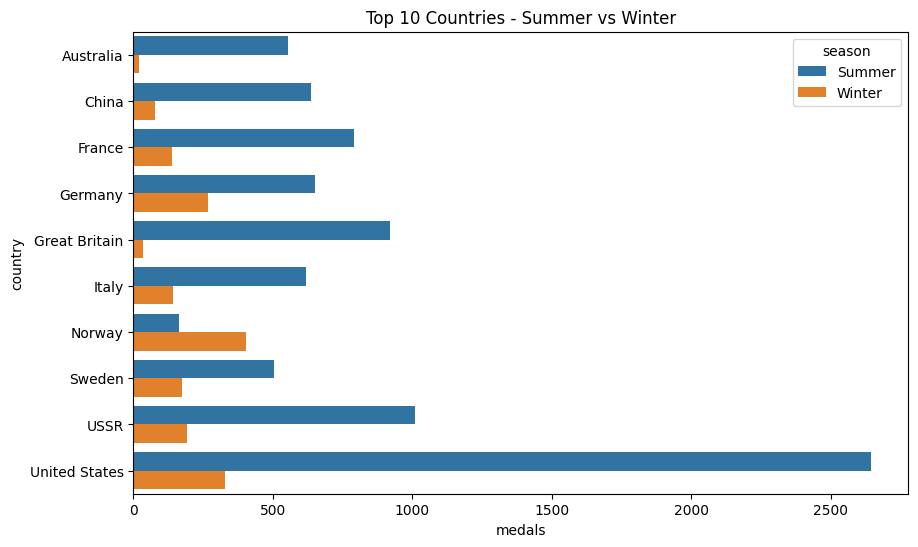

In [13]:
top_countries_season = df.groupby(['country', 'season']).size().reset_index(name='medals')
top10 = top_countries_season.groupby('country')['medals'].sum().sort_values(ascending=False).head(10).index

plt.figure(figsize=(10,6))
sns.barplot(data=top_countries_season[top_countries_season['country'].isin(top10)],
            x='medals', y='country', hue='season')
plt.title('Top 10 Countries - Summer vs Winter')
plt.show()

## Total Medals Over Time, Broken by Medal Type

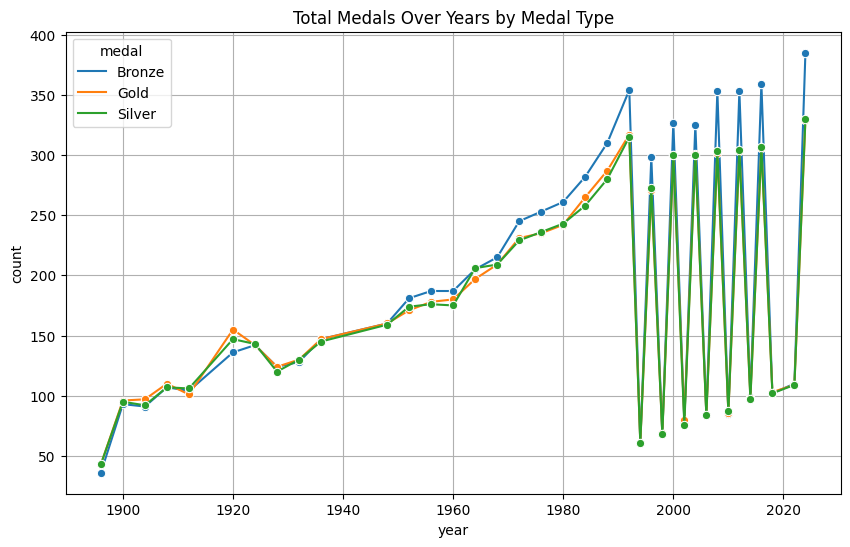

In [14]:
medal_trend = df.groupby(['year', 'medal']).size().reset_index(name='count')

plt.figure(figsize=(10,6))
sns.lineplot(data=medal_trend, x='year', y='count', hue='medal', marker='o')
plt.title('Total Medals Over Years by Medal Type')
plt.grid(True)
plt.show()

## Country-wise Medal Heatmap for Recent Games (e.g., 2024 Paris)

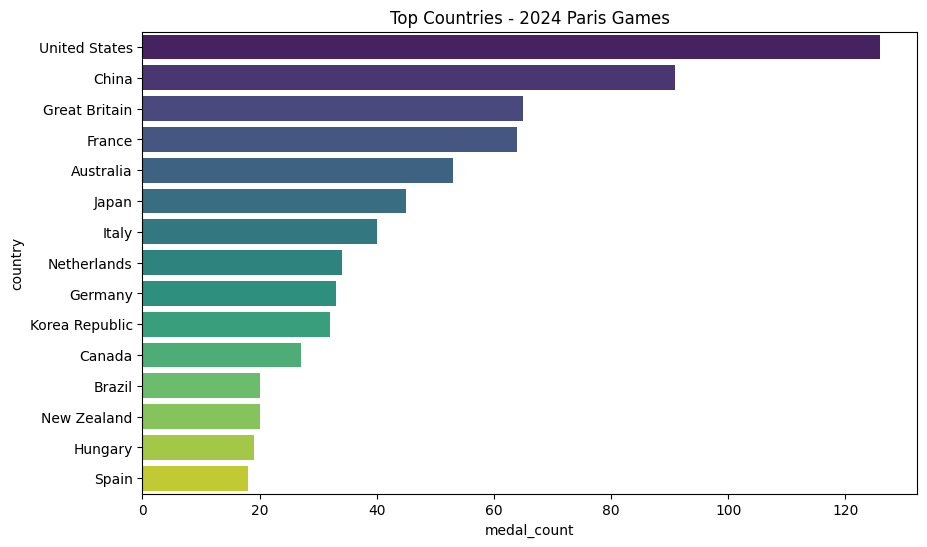

In [15]:
recent_games = df[df['games'] == '2024 Paris']
heatmap_data = recent_games['country'].value_counts().reset_index()
heatmap_data.columns = ['country', 'medal_count']

plt.figure(figsize=(10,6))
sns.barplot(y=heatmap_data['country'].head(15), x=heatmap_data['medal_count'].head(15), palette='viridis')
plt.title('Top Countries - 2024 Paris Games')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Encode categorical features
ml_df = df.dropna(subset=['medal', 'country', 'sport', 'event_gender'])
le = LabelEncoder()

ml_df['country_enc'] = le.fit_transform(ml_df['country'])
ml_df['sport_enc'] = le.fit_transform(ml_df['sport'])
ml_df['gender_enc'] = le.fit_transform(ml_df['event_gender'])
ml_df['medal_enc'] = le.fit_transform(ml_df['medal'])

X = ml_df[['country_enc', 'sport_enc', 'gender_enc']]
y = ml_df['medal_enc']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred, target_names=le.inverse_transform([0, 1, 2])))

              precision    recall  f1-score   support

      Bronze       0.38      0.37      0.37      2084
        Gold       0.38      0.45      0.41      1998
      Silver       0.32      0.27      0.29      1991

    accuracy                           0.36      6073
   macro avg       0.36      0.36      0.36      6073
weighted avg       0.36      0.36      0.36      6073



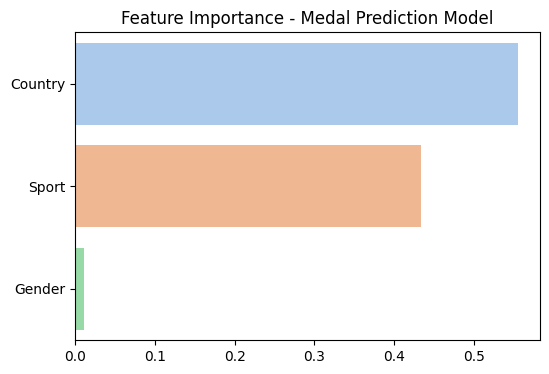

In [17]:
importances = model.feature_importances_
features = ['Country', 'Sport', 'Gender']

plt.figure(figsize=(6,4))
sns.barplot(x=importances, y=features, palette='pastel')
plt.title('Feature Importance - Medal Prediction Model')
plt.show()

## 🤖 Remarks on the Machine Learning Model

In this notebook, we attempted to predict the type of medal (Gold, Silver, Bronze) based on a few basic factors:

- *Country of the athlete or team*  
- *Sport category*  
- *Event gender (Men's, Women's, Mixed)*  

While this simplified model demonstrates the idea of predictive analytics, it's important to highlight the limitations.

---

### ⚠️ Model Performance:

The classification report shows relatively low predictive power

---

### 🎯 Key Takeaways:

- **Low accuracy (36%)** suggests that the available features are insufficient to reliably predict medal outcomes  
- Factors like *country*, *sport*, and *gender* provide context but do not determine an athlete's success  
- True success depends on intangible elements such as *training discipline*, *mental resilience*, *experience*, and *physical preparation*, which are not captured in this dataset  
- External variables like competition intensity, historical changes in rules, and athlete-specific data are missing  

---

### 💡Endnote:

While this model demonstrates the technical process of building a classifier, it reinforces an important point: 

> "Success in sports cannot be reduced to surface-level factors like nationality or event type—it's driven by individual hard work, dedication, skill, and countless unseen variables."

Future models could be improved by incorporating more granular athlete-specific data, but even then, predicting human performance remains inherently complex.



# 🏁 Conclusion & Key Takeaways

In this notebook, we explored the Olympic Medalists dataset and uncovered several interesting trends:

- 🥇 The **Summer Olympics** dominate in terms of total events and medals compared to the Winter Games  
- 🌍 Certain countries have historically dominated, with the **United States**, **Russia**, and **Germany** among the top performers  
- 🚺 There has been significant growth in **women's participation**, especially from the late 20th century onward  
- 🏆 Sports like **Athletics**, **Swimming**, and **Gymnastics** award the most medals, reflecting their broad event diversity  
- 🔥 Some team-based records list countries instead of individual athlete names, especially in early editions  

---

## 📌 Final Thoughts

This dataset provides a rich foundation to:

- Analyze dominance patterns by country or sport  
- Track historical trends in gender equality in sports  
- Explore the evolution of event popularity and participation  
- Develop more advanced predictive models for future games  

The Olympics represent not just athletic excellence, but global unity, progress, and history in the making. This analysis just scratches the surface—there's much more to explore.